In [1]:
import numpy as np
import os
import tensorflow as tf
import pandas as pd
import cv2
IMG_WIDTH=32
IMG_HEIGHT=30
IMG_FOLDER=r'Data/' 
def create_dataset(img_folder):
  img_data_array=[]
  class_name=[]
  for dir1 in os.listdir(img_folder):
    for file in os.listdir(os.path.join(img_folder, dir1)):
      image_path = os.path.join(img_folder, dir1, file)
      image = cv2.imread( image_path, cv2.COLOR_BGR2RGB)
      image = cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),
      interpolation = cv2.INTER_AREA)
      image = np.array(image)
      image = image.astype('float32')
      image /= 255
      img_data_array.append(image)
      class_name.append(dir1)
  return img_data_array, class_name
  
# Extract the image array and class name
img_data, class_name = create_dataset(IMG_FOLDER)
target_dict={k: v for v, k in enumerate(np.unique(class_name))}
# Convert the class_names to their respective numeric value based on the dictionary
target_val = [target_dict[class_name[i]] for i in range(len(class_name))]
# Convert to X - a 3d array (samples, width, height) and y - 0/1
X = tf.cast(np.array(img_data), tf.float64)
y = tf.cast(list(map(int,target_val)),tf.int32)

In [2]:
X = np.array(X)
y = np.array(y)

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_train = np.array(y_train)
y_test = np.array(y_test)
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,30,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=12, validation_data=(X_test, y_test))
model.save('classification_model.h5')


Epoch 1/12
16/16 [==============================] - 3s 104ms/step - loss: 0.6932 - accuracy: 0.4970 - val_loss: 0.6896 - val_accuracy: 0.4800
Epoch 2/12
16/16 [==============================] - 1s 82ms/step - loss: 0.6834 - accuracy: 0.6012 - val_loss: 0.6754 - val_accuracy: 0.4800
Epoch 3/12
16/16 [==============================] - 1s 62ms/step - loss: 0.6529 - accuracy: 0.6273 - val_loss: 0.6180 - val_accuracy: 0.8000
Epoch 4/12
16/16 [==============================] - 1s 41ms/step - loss: 0.5688 - accuracy: 0.7535 - val_loss: 0.5040 - val_accuracy: 0.7600
Epoch 5/12
16/16 [==============================] - 1s 40ms/step - loss: 0.4568 - accuracy: 0.8056 - val_loss: 0.3903 - val_accuracy: 0.8240
Epoch 6/12
16/16 [==============================] - 1s 40ms/step - loss: 0.4246 - accuracy: 0.8136 - val_loss: 0.3666 - val_accuracy: 0.8160
Epoch 7/12
16/16 [==============================] - 1s 40ms/step - loss: 0.3558 - accuracy: 0.8617 - val_loss: 0.3942 - val_accuracy: 0.7680
Epoch 8/12
1

### loss and accuracy of our intial model


In [4]:

loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


4/4 [==============================] - 0s 11ms/step - loss: 0.2337 - accuracy: 0.9040
Test loss: 0.23370635509490967
Test accuracy: 0.9039999842643738


### finiding the optimal hyperparameters(batch size and epochs) by using grid search

In [5]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
def display_cv_results(search_results):
    print('Best score = {:.4f} using {}'.format(search_results.best_score_, search_results.best_params_))

from keras.wrappers.scikit_learn import KerasClassifier
def create_mlp_model():
  model = Sequential()
  model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,30,1)))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(filters=32, kernel_size=(2,2), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(units=128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(units=1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
param_grid = {'epochs':[10,20,30],'batch_size': [16, 32, 64]}
model1 = KerasClassifier(build_fn=create_mlp_model, verbose=1)

grid = GridSearchCV(estimator=model1, param_grid=param_grid, n_jobs=-1,scoring="accuracy",cv=2 )
grid_result = grid.fit(X_train, y_train)  
display_cv_results(grid_result)


<ipython-input-5-eea3e5fe9327>:22: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model1 = KerasClassifier(build_fn=create_mlp_model, verbose=1)


Epoch 1/30
32/32 [==============================] - 2s 40ms/step - loss: 0.6912 - accuracy: 0.5150
Epoch 2/30
32/32 [==============================] - 1s 47ms/step - loss: 0.6527 - accuracy: 0.6273
Epoch 3/30
32/32 [==============================] - 1s 41ms/step - loss: 0.5245 - accuracy: 0.7555
Epoch 4/30
32/32 [==============================] - 1s 23ms/step - loss: 0.3790 - accuracy: 0.8337
Epoch 5/30
32/32 [==============================] - 1s 21ms/step - loss: 0.3025 - accuracy: 0.8697
Epoch 6/30
32/32 [==============================] - 1s 21ms/step - loss: 0.2669 - accuracy: 0.8958
Epoch 7/30
32/32 [==============================] - 1s 21ms/step - loss: 0.2230 - accuracy: 0.9238
Epoch 8/30
32/32 [==============================] - 1s 21ms/step - loss: 0.2198 - accuracy: 0.9158
Epoch 9/30
32/32 [==============================] - 1s 21ms/step - loss: 0.1529 - accuracy: 0.9399
Epoch 10/30
32/32 [==============================] - 1s 21ms/step - loss: 0.1394 - accuracy: 0.9559
Epoch 11/

In [9]:
pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
from scikeras.wrappers import KerasClassifier
def cnn_model_without_optimizer():
  model = Sequential()
  model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,30,1)))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(filters=32, kernel_size=(2,2), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(units=128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(units=1, activation='sigmoid'))
  return model
model_without_optimizer = KerasClassifier(model=cnn_model_without_optimizer, loss="binary_crossentropy", epochs=30, batch_size=16, verbose=0)
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model_without_optimizer, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train,y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.965936 using {'optimizer': 'Adam'}


## Explaination
First, it creates an instance of the Sequential class from keras.models, which is the basic model that a neural network can be built on.

Then, it starts adding layers to the model using the model.add() method.

It starts with a 2D convolutional layer Conv2D() with 32 filters, a kernel size of (3,3) and a rectified linear unit (ReLU) activation function. The input_shape parameter is set to (32,30,1) which represents the size of the input images.
Then it adds a max pooling layer MaxPooling2D() with a pool size of (2,2) which is used to down-sample the feature maps and reduce their dimensionality.
Next, it adds another convolutional layer Conv2D() with 64 filters, kernel size of (3,3) and a ReLU activation function.
Then again it adds a max pooling layer MaxPooling2D() with a pool size of (2,2).
Next, it adds another convolutional layer Conv2D() with 32 filters, kernel size of (2,2) and a ReLU activation function.
Then, it adds another max pooling layer MaxPooling2D() with a pool size of (2,2).
After that, it uses Flatten() layer to flatten the output from the previous layers to a 1-dimensional array.
Then, it adds a fully connected layer Dense() with 128 units and a ReLU activation function.
Then it adds a dropout layer Dropout() with a rate of 0.5, which is used to prevent overfitting by randomly setting a certain percentage of the neurons in a layer to zero during training.
Then, it adds the final dense layer Dense() with 1 unit and a sigmoid activation function, which is used for binary classification.

We later performed Grid Search Algorithm to find the most optimal optimizer, as well as the most optimal number of epochs, and batch size.

## Model Evaluation

In [14]:
from sklearn.metrics import accuracy_score 
model = grid_result
model.fit(X_train,y_train)
pred = model.predict(X_test)
accuracy = accuracy_score(pred, y_test)
print(f"Test accuracy:{accuracy}")

Test accuracy:0.96


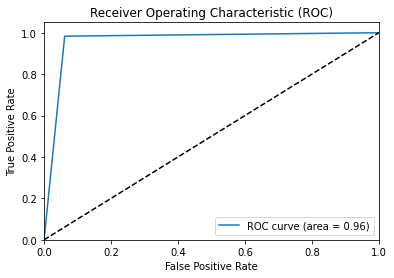

In [15]:

# Import required libraries
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Load the trained model
model = grid_result

# Make predictions on the test set
y_pred = model.predict(X_test)

# Compute the false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Compute the area under the curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()




### ROC curve(above): you can see from this graph the True Positive Rate is getting to 1 very quickly



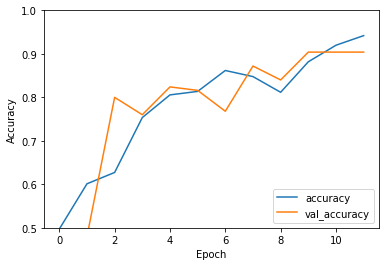

In [16]:
# Plot the training curve
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()


### Learning curve graph(above) - As you can see from the graph when the number of epchos is getting bigger the accuracy is getting higher.

## MODEL OVERFITTING VALIDATION
As seen above, the training set accuracy is not significally better than the validation set, meaning that according to this method, my model does not overfit. Also, I applied dropout to the model, in order to minimize the risk of overfitting as well. As for model performance, it is visible in the ROC plot, that the Area Under the Curve is relatively large, reaching almost 1.

## EFECT OF BATCH SIZE  ON MODEL'S LOSS AND ACCURACY

The batch size is the number of samples that are processed by the model before the model's internal parameters are updated. In other words, the batch size determines how many samples the model sees before it makes an update to its weights.

The batch size can have a significant effect on the model's ability to generalize, as well as the time it takes to train the model. Using a larger batch size can reduce the variance in the model's performance, but can also make the model converge more slowly. Using a smaller batch size can lead to faster training, but can also increase the variance in the model's performance.


As seen below, I updated the batch size to 10, and it improved the accuracy quite significantly. By an estimation of 0.04

In [45]:
model1 = Sequential()
model1.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,30,1)))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Conv2D(filters=32, kernel_size=(2,2), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Flatten())
model1.add(Dense(units=128, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(units=1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
#history = model.fit(X_train, y_train, batch_size=10, epochs=30, validation_data=(X_test, y_test))



history1=model1.fit(X_train, y_train, batch_size=12, epochs=30, validation_data=(X_test, y_test))
loss, accuracy = model1.evaluate(X_test, y_test)

print('Test loss:', loss)
print('Test accuracy:', accuracy)


Epoch 1/30
42/42 [==============================] - 2s 24ms/step - loss: 0.6918 - accuracy: 0.5070 - val_loss: 0.6824 - val_accuracy: 0.4880
Epoch 2/30
42/42 [==============================] - 1s 19ms/step - loss: 0.6350 - accuracy: 0.6573 - val_loss: 0.5563 - val_accuracy: 0.6240
Epoch 3/30
42/42 [==============================] - 1s 19ms/step - loss: 0.4562 - accuracy: 0.7956 - val_loss: 0.3598 - val_accuracy: 0.8480
Epoch 4/30
42/42 [==============================] - 1s 20ms/step - loss: 0.3515 - accuracy: 0.8317 - val_loss: 0.2871 - val_accuracy: 0.8640
Epoch 5/30
42/42 [==============================] - 1s 19ms/step - loss: 0.2417 - accuracy: 0.8918 - val_loss: 0.2570 - val_accuracy: 0.8960
Epoch 6/30
42/42 [==============================] - 1s 19ms/step - loss: 0.2237 - accuracy: 0.9098 - val_loss: 0.2439 - val_accuracy: 0.8720
Epoch 7/30
42/42 [==============================] - 1s 19ms/step - loss: 0.2006 - accuracy: 0.9178 - val_loss: 0.1732 - val_accuracy: 0.9280
Epoch 8/30
42

### loss and accuracy of our model(above)

4/4 [==============================] - 0s 11ms/step


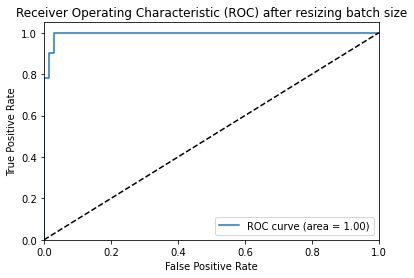

In [46]:
# Make predictions on the test set
y_pred = model1.predict(X_test)

# Compute the false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Compute the area under the curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) after resizing batch size')
plt.legend(loc="lower right")
plt.show()



### ROC graph(above): you can see from this graph the True Positive Rate starts with 1 at the begining

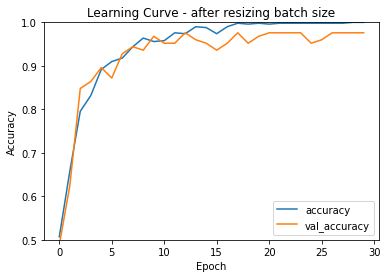

In [47]:
# Plot the training curve
plt.plot(history1.history['accuracy'], label='accuracy')
plt.plot(history1.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.title('Learning Curve - after resizing batch size')
plt.legend(loc='lower right')
plt.show()


### Learning curve graph(above)  - the accuracy increases when the number of epochs is getting bigger. As seen, the model does have a possibility of overfitting after updating the batch size, since we use a large number of epochs, which is the tradeoff of more epochs and less batch size. Also, when decreasing the size of batch size, we reach higher accuracy after less laps (epochs).

## Best Optimizer

We performed GridSearch Algorithm in order to find the optimizer with best results in terms of loss and accuracy. In this particular classification task, Adam optimizer arised as the better performed optimizer, results in better results.